<a href="https://colab.research.google.com/github/prachi2810/Probabilistic-Programming/blob/main/GMM(Happiness).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd


In [ ]:
cs = pd.read_csv('/content/happiness.csv')

In [ ]:
Happiness_Score = cs['Happiness_Score']

In [ ]:
clusters = 2
with pm.Model() as model_mg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means', mu=Happiness_Score.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=120)
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=Happiness_Score)
    trace_mg = pm.sample(random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, means, p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3852191071964695, but should be close to 0.8. Try to increase the number of tuning steps.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


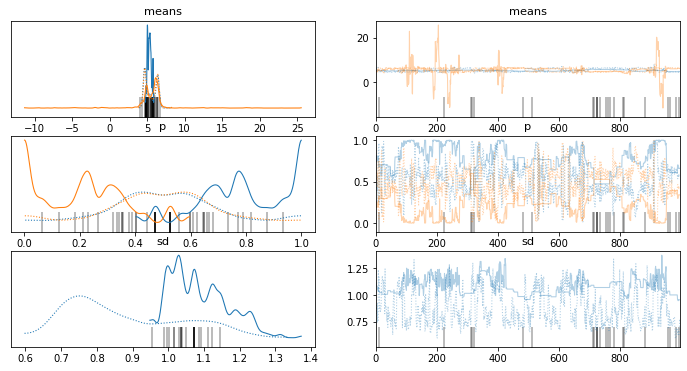

In [ ]:
var_names=['means','p','sd']
az.plot_trace(trace_mg,var_names=['means','p','sd'])
plt.show()

In [ ]:
az.summary(trace_mg,var_names)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],5.396,0.591,4.481,6.529,0.113,0.085,32.0,41.0,1.44
means[1],5.543,2.161,3.810,7.226,0.128,0.094,64.0,171.0,1.03
p[0],0.643,0.217,0.314,1.000,0.103,0.078,5.0,94.0,1.40
p[1],0.357,0.217,0.000,0.686,0.103,0.078,5.0,94.0,1.40
sd,0.983,0.166,0.678,1.228,0.076,0.057,6.0,101.0,1.27


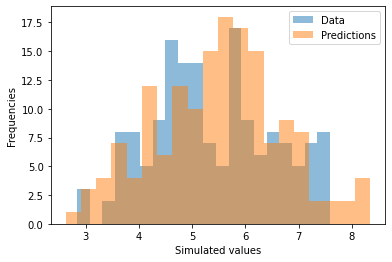

In [ ]:
#Posterior Predictive Checks
#Obtain Posterior Samples
pp = pm.sample_posterior_predictive(model=model_mg, trace=trace_mg)
# Plot original data
plt.hist(Happiness_Score, bins=20, alpha=0.5)
#Plot posterior predictives on top of that
plt.hist(np.random.choice(pp['y'].flatten(),size=len(Happiness_Score)), bins=20, alpha=0.5)
# Add legend and axes labels
plt.legend(['Data','Predictions'])
plt.xlabel('Simulated values')
plt.ylabel('Frequencies')
plt.show()